In [1]:
# Standard imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Insert local path to MAVE-NN at beginning of Python's path
import sys
sys.path.insert(0, '/Users/tareen/Desktop/Research_Projects/2020_mavenn_github/mavenn')

# Load mavenn
import mavenn
print(mavenn.__path__)

['/Users/tareen/Desktop/Research_Projects/2020_mavenn_github/mavenn/mavenn']


In [2]:
# Load gfp dataset from mavenn
data_df = mavenn.load_example_dataset(name='gfp')

# Separate test from data_df
ix_test = data_df['set']=='test'
test_df = data_df[ix_test].reset_index(drop=True)
print(f'test N: {len(test_df):,}')

# Remove test data from data_df
data_df = data_df[~ix_test].reset_index(drop=True)
print(f'training + validation N: {len(data_df):,}')
data_df.head(10)

test N: 10,985
training + validation N: 43,040


,set,HammingDistance,aaMutations,y,std,x
0,training,0,3.7192121319,0.106992,NaN,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...
1,training,1,SA108D,1.301030,NaN,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...
2,training,5,SA108D:SN144D:SI186V:SM231T:SL234P,1.301031,NaN,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...
3,training,4,SA108D:SY141N:SH146L:SE220G,1.301189,NaN,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...
4,training,1,SA108G,3.708478,0.020613,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...
5,training,4,SA108G:SK138M:SR166C:SL234P,3.582764,NaN,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...
6,training,5,SA108G:SK154E:SF163S:SL192Q:SL193P,1.499573,NaN,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...
7,training,2,SA108G:SK156R,3.659013,NaN,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...
8,training,5,SA108G:SK156R:SI159V:SI186V:ST223S,3.573855,NaN,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...
9,validation,5,SA108P:SK111R:SG172S:SL176P:SS200G,1.301031,NaN,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...


In [3]:
# Get sequence length
L = len(data_df['x'][0])

# Define model
model = mavenn.Model(regression_type='GE',
                     L=L,
                     alphabet='protein*',
                     gpmap_type='additive',
                     ge_nonlinearity_type='linear',
                     ge_noise_model_type='Gaussian',
                     ge_heteroskedasticity_order=0)

In [4]:
# Set training data
model.set_data(x=data_df['x'],
               y=data_df['y'],
               validation_flags=(data_df['set']=='validation'),
               shuffle=True)

N = 43,040 observations set as training data.
Using 24.7% for validation.
Data shuffled.
Time to set data: 4.09 sec.


In [5]:
# Fit model to data
history = model.fit(learning_rate=.0002,
                    epochs=1000,
                    batch_size=500,
                    early_stopping=True,
                    early_stopping_patience=25,
                    linear_initialization=False)

Epoch 1/1000
65/65 [==============================] - 2s 20ms/step - loss: 712.0897 - I_var: -2.1371 - val_loss: 704.5103 - val_I_var: -2.1379
Epoch 2/1000
65/65 [==============================] - 1s 17ms/step - loss: 711.6281 - I_var: -2.1364 - val_loss: 703.8807 - val_I_var: -2.1371
Epoch 3/1000
65/65 [==============================] - 1s 15ms/step - loss: 709.9470 - I_var: -2.1355 - val_loss: 703.3237 - val_I_var: -2.1362
Epoch 4/1000
65/65 [==============================] - 1s 17ms/step - loss: 710.7635 - I_var: -2.1345 - val_loss: 702.6127 - val_I_var: -2.1346
Epoch 5/1000
65/65 [==============================] - 1s 15ms/step - loss: 708.8714 - I_var: -2.1322 - val_loss: 701.5131 - val_I_var: -2.1318
Epoch 6/1000
65/65 [==============================] - 1s 15ms/step - loss: 707.3989 - I_var: -2.1285 - val_loss: 699.9406 - val_I_var: -2.1272
Epoch 7/1000
65/65 [==============================] - 1s 15ms/step - loss: 705.9197 - I_var: -2.1233 - val_loss: 697.8616 - val_I_var: -2.1210

Epoch 58/1000
65/65 [==============================] - 1s 14ms/step - loss: 439.5938 - I_var: -1.3337 - val_loss: 444.6111 - val_I_var: -1.3451
Epoch 59/1000
65/65 [==============================] - 1s 14ms/step - loss: 445.4774 - I_var: -1.3312 - val_loss: 443.7594 - val_I_var: -1.3423
Epoch 60/1000
65/65 [==============================] - 1s 14ms/step - loss: 443.8997 - I_var: -1.3281 - val_loss: 442.8817 - val_I_var: -1.3396
Epoch 61/1000
65/65 [==============================] - 1s 14ms/step - loss: 438.7183 - I_var: -1.3259 - val_loss: 442.4514 - val_I_var: -1.3382
Epoch 62/1000
65/65 [==============================] - 1s 15ms/step - loss: 441.2262 - I_var: -1.3220 - val_loss: 441.5321 - val_I_var: -1.3352
Epoch 63/1000
65/65 [==============================] - 1s 14ms/step - loss: 437.2250 - I_var: -1.3220 - val_loss: 441.3135 - val_I_var: -1.3343
Epoch 64/1000
65/65 [==============================] - 1s 14ms/step - loss: 438.6343 - I_var: -1.3175 - val_loss: 440.4070 - val_I_var: 

Epoch 115/1000
65/65 [==============================] - 1s 15ms/step - loss: 419.4960 - I_var: -1.2654 - val_loss: 432.2697 - val_I_var: -1.3033
Epoch 116/1000
65/65 [==============================] - 1s 15ms/step - loss: 418.8931 - I_var: -1.2632 - val_loss: 431.8297 - val_I_var: -1.3019
Epoch 117/1000
65/65 [==============================] - 1s 15ms/step - loss: 421.6668 - I_var: -1.2632 - val_loss: 432.0597 - val_I_var: -1.3026
Epoch 118/1000
65/65 [==============================] - 1s 15ms/step - loss: 418.4399 - I_var: -1.2621 - val_loss: 432.6856 - val_I_var: -1.3042
Epoch 119/1000
65/65 [==============================] - 1s 15ms/step - loss: 420.9339 - I_var: -1.2625 - val_loss: 431.7088 - val_I_var: -1.3014
Epoch 120/1000
65/65 [==============================] - 1s 15ms/step - loss: 420.5747 - I_var: -1.2621 - val_loss: 431.6816 - val_I_var: -1.3013
Epoch 121/1000
65/65 [==============================] - 1s 15ms/step - loss: 419.8052 - I_var: -1.2617 - val_loss: 433.4528 - val_

65/65 [==============================] - 1s 20ms/step - loss: 412.4756 - I_var: -1.2402 - val_loss: 430.1692 - val_I_var: -1.2963
Epoch 228/1000
65/65 [==============================] - 1s 19ms/step - loss: 410.7496 - I_var: -1.2414 - val_loss: 430.3024 - val_I_var: -1.2967
Epoch 229/1000
65/65 [==============================] - 1s 22ms/step - loss: 412.5886 - I_var: -1.2402 - val_loss: 430.0492 - val_I_var: -1.2960
Epoch 230/1000
65/65 [==============================] - 1s 23ms/step - loss: 414.0747 - I_var: -1.2397 - val_loss: 430.4314 - val_I_var: -1.2971
Epoch 231/1000
65/65 [==============================] - 1s 23ms/step - loss: 411.9068 - I_var: -1.2395 - val_loss: 430.0770 - val_I_var: -1.2961
Epoch 232/1000
65/65 [==============================] - 1s 20ms/step - loss: 411.3903 - I_var: -1.2393 - val_loss: 431.7475 - val_I_var: -1.3009
Epoch 233/1000
65/65 [==============================] - 1s 19ms/step - loss: 410.3863 - I_var: -1.2397 - val_loss: 430.1487 - val_I_var: -1.2963


65/65 [==============================] - 1s 19ms/step - loss: 410.2954 - I_var: -1.2343 - val_loss: 429.3570 - val_I_var: -1.2969
Epoch 340/1000
65/65 [==============================] - 1s 19ms/step - loss: 408.7414 - I_var: -1.2344 - val_loss: 428.9260 - val_I_var: -1.2957
Epoch 341/1000
65/65 [==============================] - 1s 19ms/step - loss: 410.4916 - I_var: -1.2331 - val_loss: 429.1873 - val_I_var: -1.2965
Epoch 342/1000
65/65 [==============================] - 1s 22ms/step - loss: 410.2543 - I_var: -1.2341 - val_loss: 429.6009 - val_I_var: -1.2978
Epoch 343/1000
65/65 [==============================] - 1s 22ms/step - loss: 407.9957 - I_var: -1.2336 - val_loss: 433.0224 - val_I_var: -1.3077
Epoch 344/1000
65/65 [==============================] - ETA: 0s - loss: 409.6950 - I_var: -1.23 - 1s 21ms/step - loss: 409.6781 - I_var: -1.2349 - val_loss: 428.9238 - val_I_var: -1.2958
Epoch 345/1000
65/65 [==============================] - 1s 21ms/step - loss: 409.6264 - I_var: -1.2335 

65/65 [==============================] - 1s 20ms/step - loss: 405.5354 - I_var: -1.2310 - val_loss: 428.1727 - val_I_var: -1.2970
Epoch 452/1000
65/65 [==============================] - 1s 20ms/step - loss: 407.5836 - I_var: -1.2308 - val_loss: 427.8429 - val_I_var: -1.2961
Epoch 453/1000
65/65 [==============================] - 1s 20ms/step - loss: 408.5722 - I_var: -1.2312 - val_loss: 428.0653 - val_I_var: -1.2967
Epoch 454/1000
65/65 [==============================] - 1s 21ms/step - loss: 406.8372 - I_var: -1.2306 - val_loss: 427.5751 - val_I_var: -1.2954
Epoch 455/1000
65/65 [==============================] - 1s 20ms/step - loss: 408.1598 - I_var: -1.2303 - val_loss: 430.3419 - val_I_var: -1.3034
Epoch 456/1000
65/65 [==============================] - 1s 20ms/step - loss: 408.4521 - I_var: -1.2318 - val_loss: 429.3744 - val_I_var: -1.3007
Epoch 457/1000
65/65 [==============================] - 1s 20ms/step - loss: 403.5271 - I_var: -1.2312 - val_loss: 428.3432 - val_I_var: -1.2977


65/65 [==============================] - 2s 24ms/step - loss: 405.1446 - I_var: -1.2302 - val_loss: 426.4901 - val_I_var: -1.2954
Epoch 564/1000
65/65 [==============================] - 1s 22ms/step - loss: 401.6996 - I_var: -1.2295 - val_loss: 426.4370 - val_I_var: -1.2952
Epoch 565/1000
65/65 [==============================] - 2s 24ms/step - loss: 404.9704 - I_var: -1.2292 - val_loss: 426.4477 - val_I_var: -1.2953
Epoch 566/1000
65/65 [==============================] - 1s 23ms/step - loss: 403.0289 - I_var: -1.2293 - val_loss: 426.5279 - val_I_var: -1.2955
Epoch 567/1000
65/65 [==============================] - 1s 20ms/step - loss: 406.7288 - I_var: -1.2306 - val_loss: 426.5463 - val_I_var: -1.2956
Epoch 568/1000
65/65 [==============================] - 1s 20ms/step - loss: 402.9544 - I_var: -1.2307 - val_loss: 426.4704 - val_I_var: -1.2954
Epoch 569/1000
65/65 [==============================] - 1s 22ms/step - loss: 409.4404 - I_var: -1.2293 - val_loss: 426.6139 - val_I_var: -1.2959


65/65 [==============================] - 1s 20ms/step - loss: 403.9315 - I_var: -1.2284 - val_loss: 425.8896 - val_I_var: -1.2964
Epoch 676/1000
65/65 [==============================] - 1s 21ms/step - loss: 402.9188 - I_var: -1.2301 - val_loss: 426.1730 - val_I_var: -1.2972
Epoch 677/1000
65/65 [==============================] - 1s 20ms/step - loss: 408.7301 - I_var: -1.2304 - val_loss: 426.1120 - val_I_var: -1.2971
Epoch 678/1000
65/65 [==============================] - 1s 20ms/step - loss: 399.1537 - I_var: -1.2291 - val_loss: 425.9137 - val_I_var: -1.2965
Epoch 679/1000
65/65 [==============================] - 1s 20ms/step - loss: 408.7298 - I_var: -1.2291 - val_loss: 426.3162 - val_I_var: -1.2977
Epoch 680/1000
65/65 [==============================] - 1s 20ms/step - loss: 403.0207 - I_var: -1.2285 - val_loss: 426.5204 - val_I_var: -1.2983
Epoch 681/1000
65/65 [==============================] - 1s 20ms/step - loss: 401.8036 - I_var: -1.2287 - val_loss: 427.4287 - val_I_var: -1.3010


65/65 [==============================] - 1s 15ms/step - loss: 405.9016 - I_var: -1.2282 - val_loss: 425.4526 - val_I_var: -1.2974
Epoch 788/1000
65/65 [==============================] - 1s 15ms/step - loss: 406.9947 - I_var: -1.2302 - val_loss: 426.8629 - val_I_var: -1.3015
Epoch 789/1000
65/65 [==============================] - 1s 15ms/step - loss: 402.3708 - I_var: -1.2280 - val_loss: 425.6901 - val_I_var: -1.2981
Epoch 790/1000
65/65 [==============================] - 1s 15ms/step - loss: 407.8142 - I_var: -1.2283 - val_loss: 425.9179 - val_I_var: -1.2988
Epoch 791/1000
65/65 [==============================] - 1s 15ms/step - loss: 398.3772 - I_var: -1.2298 - val_loss: 424.8896 - val_I_var: -1.2958
Epoch 792/1000
65/65 [==============================] - 1s 15ms/step - loss: 401.8207 - I_var: -1.2285 - val_loss: 424.7902 - val_I_var: -1.2955
Epoch 793/1000
65/65 [==============================] - 1s 15ms/step - loss: 397.9218 - I_var: -1.2283 - val_loss: 424.8975 - val_I_var: -1.2959


65/65 [==============================] - 1s 15ms/step - loss: 400.7775 - I_var: -1.2273 - val_loss: 427.5518 - val_I_var: -1.3053
Epoch 900/1000
65/65 [==============================] - 1s 15ms/step - loss: 400.1532 - I_var: -1.2277 - val_loss: 424.6058 - val_I_var: -1.2968
Epoch 901/1000
65/65 [==============================] - 1s 15ms/step - loss: 398.2995 - I_var: -1.2273 - val_loss: 425.4799 - val_I_var: -1.2994
Epoch 902/1000
65/65 [==============================] - 1s 15ms/step - loss: 401.4797 - I_var: -1.2297 - val_loss: 424.6996 - val_I_var: -1.2971
Epoch 903/1000
65/65 [==============================] - 1s 15ms/step - loss: 405.5762 - I_var: -1.2282 - val_loss: 424.8984 - val_I_var: -1.2977
Epoch 904/1000
65/65 [==============================] - 1s 15ms/step - loss: 401.9889 - I_var: -1.2270 - val_loss: 424.1707 - val_I_var: -1.2956
Epoch 905/1000
65/65 [==============================] - 1s 15ms/step - loss: 402.5130 - I_var: -1.2282 - val_loss: 424.2222 - val_I_var: -1.2957


In [6]:
# Save model
#model.save('models/gfp_linear_additive_homogaussian')

Model saved to these files:
	models/gfp_linear_additive_homogaussian.pickle
	models/gfp_linear_additive_homogaussian.h5


In [3]:
# Load model
model = mavenn.load('models/gfp_linear_additive_homogaussian')

Model loaded from these files:
	models/gfp_linear_additive_homogaussian.pickle
	models/gfp_linear_additive_homogaussian.h5


In [4]:
# Subsample indices for easy plotting and information estimation
N_test = len(test_df)
ix = np.random.rand(N_test) < .5

# Get x and y
x_test = test_df['x'].values[ix]
y_test = test_df['y'].values[ix]

On test data:
I_var_test: -1.373 +- 0.030 bits
I_pred_test: 1.145 +- 0.015 bits


Text(0.5, 1.0, 'training hisotry')

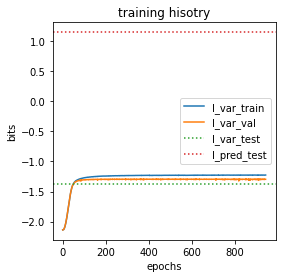

In [5]:
# Show training history
print('On test data:')

# Compute likelihood information
I_var, dI_var =  model.I_variational(x=x_test, y=y_test)
print(f'I_var_test: {I_var:.3f} +- {dI_var:.3f} bits') 

# Compute predictive information
I_pred, dI_pred = model.I_predictive(x=x_test, y=y_test)
print(f'I_pred_test: {I_pred:.3f} +- {dI_pred:.3f} bits')

I_var_hist = model.history['I_var']
val_I_var_hist = model.history['val_I_var']

fig, ax = plt.subplots(1,1,figsize=[4,4])
ax.plot(I_var_hist, label='I_var_train')
ax.plot(val_I_var_hist, label='I_var_val')
ax.axhline(I_var, color='C2', linestyle=':', label='I_var_test')
ax.axhline(I_pred, color='C3', linestyle=':', label='I_pred_test')
ax.legend()
ax.set_xlabel('epochs')
ax.set_ylabel('bits')
ax.set_title('training hisotry')
#ax.set_ylim([0, I_pred*1.2]);

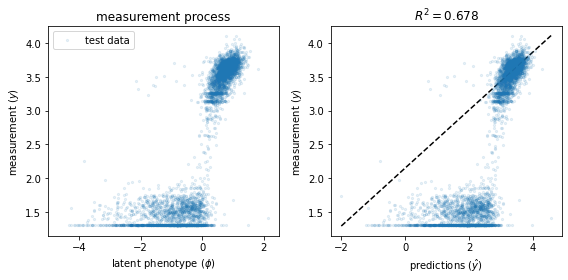

In [6]:
# Compute phi and yhat values
phi = model.x_to_phi(x_test)
yhat = model.phi_to_yhat(phi)

# Create grid for plotting yhat and yqs
phi_lim = [-5, 2.5]
phi_grid = np.linspace(phi_lim[0], phi_lim[1], 1000)
yhat_grid = model.phi_to_yhat(phi_grid)
yqs_grid = model.yhat_to_yq(yhat_grid, q=[.16,.84])

# Create two panels
fig, ax = plt.subplots(1, 2, figsize=[8, 4])

# Illustrate measurement process with GE curve
ax[0].scatter(phi, y_test, color='C0', s=5, alpha=.1, label='test data')
# ax[0].plot(phi_grid, yhat_grid, linewidth=2, color='C1',
#         label='$\hat{y} = g(\phi)$')
# ax[0].plot(phi_grid, yqs_grid[:, 0], linestyle='--', color='C1',
#         label='68% CI')
# ax[0].plot(phi_grid, yqs_grid[:, 1], linestyle='--', color='C1')
ax[0].set_xlim(phi_lim)
ax[0].set_xlabel('latent phenotype ($\phi$)')
ax[0].set_ylabel('measurement ($y$)')
ax[0].set_title('measurement process')
ax[0].legend()

R_square_on_test = np.corrcoef(yhat,y_test)[0][1]**2
ax[1].plot((min(yhat), max(yhat)), (min(y_test), max(y_test)), '--',color='black')
ax[1].scatter(yhat, y_test, color='C0', s=5, alpha=.1, label='test data',zorder=10)
ax[1].set_xlabel('predictions ($\hat{y}$)')
ax[1].set_ylabel('measurement ($y$)')
ax[1].set_title("$R^2 = $"+str(R_square_on_test)[0:5])


# Fix up plot
fig.tight_layout()
#plt.savefig('gfp_ge_additive_measurement_process_yhat.png',bbox_inches='tight',dpi=300)
plt.show()

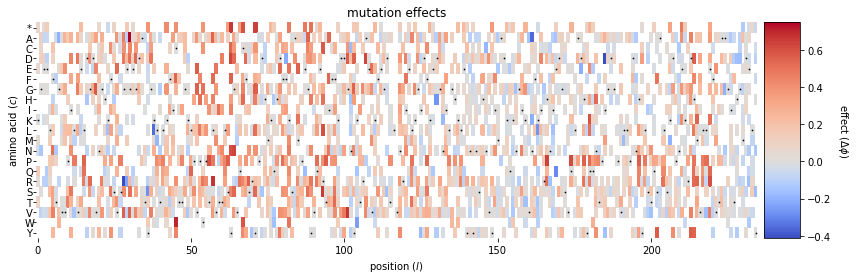

In [7]:
# Set wild-type sequence
gfp_consensus_seq = model.x_stats['consensus_seq']

# Get effects of all single-point mutations on phi
theta_dict = model.get_theta(gauge='user',
                             x_wt=gfp_consensus_seq)

# Create two panels
fig, ax = plt.subplots(1, 1, figsize=[12, 4])

# Left panel: draw heatmap illustrating 1pt mutation effects
ax, cb = mavenn.heatmap(theta_dict['theta_lc'],
                        alphabet=theta_dict['alphabet'],
                        seq=gfp_consensus_seq,
                        #cmap='PiYG',
                        ccenter=0,
                        ax=ax)
ax.set_xlabel('position ($l$)')
ax.set_ylabel('amino acid ($c$)')
cb.set_label('effect ($\Delta\phi$)', rotation=-90, va="bottom")
ax.set_title('mutation effects')



# Fix up plot
fig.tight_layout()
#plt.savefig('gfp_additive_heatmap.png',bbox_inches='tight',dpi=300)
plt.show()
